# Laboratório de prototipagem de sistemas de comunicações 
## Gabarito - Prova 01

### Questão 1: 
Considerando o **Hands-On 09: Modulação digital(modulação, demodulação e desempenho em ruído AWGN)** -Parte 01, qual a probabilidade de erro para um sistema digital binário com sinais antipodais e Eb/No = 10? **(Correta)**

In [2]:
clc;clear all;close all;
%% Questão 1:
Eb_No=10;                                                                                   % Valor escalar da Eb/No
vtTeoErrorAnti = qfunc(sqrt(2*Eb_No));                                                      % Probabilidade de erro
disp(['R: A probabilidade de erro é de P_e = ', num2str(vtTeoErrorAnti)])    

R: A probabilidade de erro é de P_e = 3.8721e-06


### Questão 2:  
Considerando a Prática 1: **PDFs e CDFs de VAs clássicas do Hands-On 07**, a duração de chamadas de uma operadora telefônica é uma VA com distribuição exponencial de taxa $\lambda=30$ segundos/chamada. Qual a probabilidade de assinantes fazerem uma chamada com mais de $4$ minutos de duração? **(Correta)**

In [1]:
clc;clear all;close all;
%% Questão 2:
% Pela PDF
lambda=30/60;                                                              % Lambda em minutos por chamada
x=4:0.01:99999;                                                            % Duração da chamada em questão limite =999999 tao grande quanto queira
f=lambda*exp(-lambda*x);                                                   % Função probabilidade 
disp(['R: A probabilidade de a chamada durar mais que 4 minutos é de P = ', num2str(sum(f)),'%'])  % Percentual
% Pela CDF
CDF=exp(-lambda*4);                                                        % probabilidade de ocorrer entre 0 e 4
Resposta=CDF*100;                                                          % probabilidade de ocorrer de 4 a inf
disp(['R: A probabilidade de a chamada durar mais que 4 minutos é de P = ', num2str(Resposta),'%'])  % Percentual

R: A probabilidade de a chamada durar mais que 4 minutos é de P = 13.5674%
R: A probabilidade de a chamada durar mais que 4 minutos é de P = 13.5335%


### Questão 3:
Considerando a Prática 2: **Recepção AM-DSB (detecção de envoltória) do Hands-On 05**, qual o  erro médio quadrático entre a envoltória ideal e a envoltória recuperada quando $\tau = 3\,.\,10^{-3}$?  **(Correta)**

In [96]:
clc;clear all;close all;
%% Questão 3
tau =1e-3;                                                     % Constante de tempo do detector de envelope  

%                                                       Copiado
%-----------------------------------------------------------------------------------------------------------------------
t = [0:999]*1e-6;                                               % Definição do vetor tempo
Ts = 1e-6;                                                      % Definição do período
fc = 10000;                                                     % Frequência da portadora
fm = 1500;                                                      % Frequência do sinal
Mu = 0.6;                                                       % Índice de modulação
x_AMo = (1+Mu*cos(2*pi*fm*t)).*cos(2*pi*fc*t);                  % Onda Modulada AM-DSB
% Envelope ideal do AM-DSB
x_envIdeal = abs(1+Mu*cos(2*pi*fm*t));
% Detector de envelope.
x_AM = x_AMo.*(x_AMo>0);                                        % Parte positiva da onda AM
x_env = zeros(size(x_AM));                                      % Vetor de zeros vetor pra guardar o envelope
nSamp = length(x_AM);                                           % Número de amostras da onda AM
out = -1;                                                       % Saída inicial (temporária)
% Cálculo da saida
for i=1:nSamp,
    inp = x_AM(i);
    if (inp>=out)                                               % Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        out = inp;
    else                                                        % Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        out = out*(1-Ts/tau);
    end
    x_env(i) = out;
end
%-----------------------------------------------------------------------------------------------------------------------

% Cálculo do erro médio quadrático                                                                                             
Erro_MSE=(x_envIdeal-x_env).^2;
Erro_MSE=sum(Erro_MSE)/length(Erro_MSE);
disp(['R: O Erro médio quadrático é de E = ',num2str(Erro_MSE)]);

R: O Erro médio quadrático é de E = 0.20157


### Questão 4:
Considerando a Prática 2: **Ruído em comunicações digitais do Hands-On 08**, qual a potência do ruído para uma modulação 8-PSK e uma Eb/No = 20dB? **(Correta)**

In [3]:
clc;clear all;close all;
EbN0_dB = 20;                                          % Eb/N0 de entrada
Ns = 10^5;                                             % Número de símbolos simulados
sigmaRuido = 10^(-EbN0_dB/(2*10));                     % Desvio padrão do ruído AWGN 
n = sigmaRuido/sqrt(2)*[randn(1,Ns) + j*randn(1,Ns)];  % Amostras do ruído AWGN
Resposta = sum(abs(n).^2)/length(n)
Resposta_db=10*log10(Resposta)


Resposta =

    0.0100


Resposta_db =

  -20.0058



### Questão 5:  
Considerando a Prática 3: **Quantização do Hands-On 06**, qual a SQNR para $32$ níveis de quantização?   **(Correto)**

In [10]:
clc;close all;clear all;
%% Questão 5
L= 128; 
%                                                   Copiado
%-----------------------------------------------------------------------------------------------------------------------
T=0.002;                                                % Taxa de amostragem (500kHz)
Tf=1;                                                   % Tempo final em segundos
t=0:T:Tf-T;                                             % Definição do eixo do tempo      
fm1=3;                                                  % Frequência senoide 1      
fm2=1;                                                  % Frequência senoide 2
m_t=sin(2*pi*fm2*t)-sin(2*pi*fm1*t);                    % Sinal mensagem m(t)
ts=0.02;                                                % Nova taxa de amostragem
N_samp=round(ts/T);                                     % Número de elementos
% Quantização
sig_max=max(m_t);                                       % Encontra pico máximo
sig_min=min(m_t);                                       % Encontra pico mínimo
Delta=(sig_max-sig_min)/L;                              % Intervalo de quantização (separação entre um nível e outro)
q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;          % Vetor com amplitudes dos Q níveis 
sigp=m_t-sig_min;                                       % Shift para cima
sigp=sigp*(1/Delta);                                    % Calcula a quantidade de nívels
sigp=sigp+1/2;                                          % Tira elementos do zero 
qindex=round(sigp);                                     % Encontra inteiro mais proximo para cada elemento
qindex=min(qindex,L);                                   % Remove o excedente de qindex 
q_out=q_level(qindex);                                  % Calcula a amplitude quantizada de cada amostra
%-----------------------------------------------------------------------------------------------------------------------

% Cálculo da SQNR m_t

N=length(m_t);                                          % Comprimento do vetor 
Psignal=sum(m_t.^2);                                    % Potência do sinal
Pnoise=sum((m_t-q_out).^2);                             % Potência do ruído
SQNR=Psignal/Pnoise                                     % SQNR linear 
SQNR_db1=10*log10(SQNR)
%SQNR_db2=10*log10(sum(m_t.^2)/sum((m_t-q_out).^2))


SQNR =

   1.2485e+04


SQNR_db1 =

   40.9639



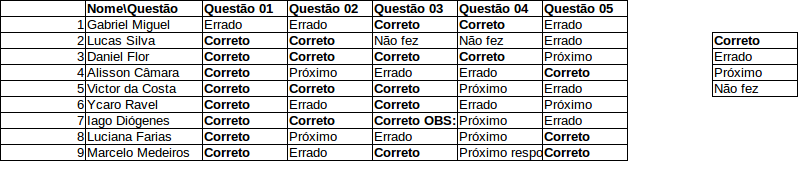